In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('./Data/cleaned_merged_all_data.csv')

In [5]:
columns_to_be_removed = df.isnull().sum()[df.isnull().sum().sort_values() > 197285].index

In [6]:
invoice = df.drop(columns=columns_to_be_removed)

In [7]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,divisionname,regionname,Districtname,statename,Pin code,Cust Type,Customer No.,latitude,longitude,Partner Type_x,Data Origin_x,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID
0,0.000,MAJIWADA,Thane,Thane Central,Mumbai,Thane,MAHARASHTRA,400601,Retail,67849,19.194,73.000,1.000,Z007,02-01-2015,7005200002.000,11:30:36,168303,13-12-2014,14:29:43,49317.000,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1
1,1.000,THNAE,THNAE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,Retail,84419,19.194,73.000,1.000,Z001,03-01-2015,7005200003.000,10:07:32,173997,02-01-2015,14:12:18,78584.000,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2
2,2.000,THANE,THANE[W],Thane Central,Mumbai,Thane,MAHARASHTRA,400607,Retail,81055,19.194,73.000,1.000,Z005,03-01-2015,7005200004.000,11:12:57,173889,02-01-2015,11:40:44,33985.000,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2
3,3.000,THNAE,THNAE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,Retail,84419,19.194,73.000,1.000,Z001,03-01-2015,7005200005.000,11:40:44,174158,03-01-2015,10:12:32,78584.000,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2
4,4.000,THANE,THANE,Thane Central,Mumbai,Thane,MAHARASHTRA,400603,Retail,18980,19.194,73.000,1.000,Z005,03-01-2015,7005200006.000,12:07:17,173860,02-01-2015,10:45:42,50057.000,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2


In [8]:
invoice.shape

(492315, 35)

In [9]:
invoice = invoice[(invoice['Total Amt Wtd Tax.']>0)]

In [10]:
import datetime as dt
invoice["Invoice Date"]=pd.to_datetime(invoice["Invoice Date"],dayfirst=True)
invoice["JobCard Date"]=pd.to_datetime(invoice["JobCard Date"],dayfirst=True)
invoice['Service_Period'] = invoice['Invoice Date'] - invoice['JobCard Date']

In [11]:
invoice['Service_Period'] = invoice['Service_Period'].dt.days+ 1

In [12]:
invoice['Service_Period'].isnull().sum()

0

In [13]:
invoice['Service_Period'].describe()

count   440143.000
mean         4.434
std         11.602
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        728.000
Name: Service_Period, dtype: float64

In [14]:
invoice.isnull().sum()

Unnamed: 0                0
Area / Locality       22813
CITY                      0
divisionname          23396
regionname            23396
Districtname          21491
statename             19834
Pin code                  0
Cust Type                 0
Customer No.              0
latitude              33505
longitude             33505
Partner Type_x            2
Data Origin_x             2
Invoice Date              0
Invoice No                0
Invoice Time              0
Job Card No               0
JobCard Date              0
JobCard Time              0
KMs Reading               0
Labour Total              0
Make                      0
Misc Total                0
Model                  1313
OSL Total                 0
Order Type                0
Parts Total               0
Plant                     0
Plant Name1               0
Print Status              0
Recovrbl Exp              0
Regn No                  15
Total Amt Wtd Tax.        0
User ID                   0
Service_Period      

In [15]:
invoice.drop(['Area / Locality','CITY'],1,inplace = True)

In [16]:
invoice.dropna(inplace = True)

In [17]:
invoice.shape

(405109, 34)

In [18]:
import datetime as dt
snapshot_date = max(invoice['Invoice Date']) + dt.timedelta(days=1)

In [19]:
snapshot_date

Timestamp('2016-11-01 00:00:00')

In [22]:
datamart = invoice.groupby(["Customer No.",'statename',"divisionname","Make","Model",'Order Type']).agg({
'Invoice Date': lambda x: (snapshot_date - x.max()).days,
'Invoice No': 'count',
'Total Amt Wtd Tax.': 'mean',
'Service_Period':'mean'})

In [23]:
datamart.rename(columns = {'Invoice Date': 'Recency',
'Invoice No': 'Frequency',
'Total Amt Wtd Tax.': 'MonetaryValue'}, inplace=True)

In [24]:
datamart.head(20)

Recency  \
Customer No. statename     divisionname   Make                 Model  Order Type                   
10           MAHARASHTRA   Mumbai  North  GENERAL MOTORS       OPTRA  Paid Service          1233   
                                                                      Running Repairs       1581   
100          MAHARASHTRA   Mumbai  North  HONDA                CITY   Accidental            1667   
                                                                      Paid Service          1511   
1000         MAHARASHTRA   Pune City West MARUTI SUZUKI        ALTO   Paid Service           850   
                                                                      Running Repairs        749   
10000        TELANGANA     Secunderabad   MARUTI SUZUKI        WAGONR Running Repairs        437   
                                                                      SMC Value Package      797   
100000       GUJARAT       Surat          HYUNDAI              ACCENT Accidental             563   
100001       MAHARASHTRA   Pune Moffusil  MAHINDRA &  MAHINDRA BOLERO Running Repairs        428   
                                          SKODA                SUPERB Running Repairs        561   
                                          TOYOTA               INNOVA Accidental             351   
100004       MAHARASHTRA   Pune City West HYUNDAI              I20    Running Repairs        563   
100005       UTTAR PRADESH Ghaziabad      HYUNDAI              SANTRO Paid Service           563   
100006       PUNJAB        Ferozpur       MARUTI SUZUKI        800    Paid Service           561   
100007       TAMIL NADU    Tirupur        HYUNDAI              VERNA  Paid Service           234   
                                                                      Running Repairs         90   
100008       MAHARASHTRA   Nagpur City    TATA MOTORS          VISTA  Running Repairs        435   
100009       HARYANA       Ambala         MARUTI SUZUKI        WAGONR Paid Service           551   
                                                                      Running Repairs        551   

                                                                                         Frequency  \
Customer No. statename     divisionname   Make                 Model  Order Type                     
10           MAHARASHTRA   Mumbai  North  GENERAL MOTORS       OPTRA  Paid Service               4   
                                                                      Running Repairs            1   
100          MAHARASHTRA   Mumbai  North  HONDA                CITY   Accidental                 1   
                                                                      Paid Service               1   
1000         MAHARASHTRA   Pune City West MARUTI SUZUKI        ALTO   Paid Service               4   
                                                                      Running Repairs            2   
10000        TELANGANA     Secunderabad   MARUTI SUZUKI        WAGONR Running Repairs            3   
                                                                      SMC Value Package          1   
100000       GUJARAT       Surat          HYUNDAI              ACCENT Accidental                 1   
100001       MAHARASHTRA   Pune Moffusil  MAHINDRA &  MAHINDRA BOLERO Running Repairs            1   
                                          SKODA                SUPERB Running Repairs            1   
                                          TOYOTA               INNOVA Accidental                 1   
100004       MAHARASHTRA   Pune City West HYUNDAI              I20    Running Repairs            1   
100005       UTTAR PRADESH Ghaziabad      HYUNDAI              SANTRO Paid Service               1   
100006       PUNJAB        Ferozpur       MARUTI SUZUKI        800    Paid Service               1   
100007       TAMIL NADU    Tirupur        HYUNDAI              VERNA  Paid Service               2   
                                                    

In [25]:
datamart['Tenure'] = invoice.groupby(['Customer No.','statename',"divisionname","Make","Model",'Order Type']).agg({'Invoice Date': lambda x: ((x.max() - x.min())+dt.timedelta(days=1)).days})

In [26]:
datamart.head()

Recency  \
Customer No. statename   divisionname   Make           Model Order Type                 
10           MAHARASHTRA Mumbai  North  GENERAL MOTORS OPTRA Paid Service        1233   
                                                             Running Repairs     1581   
100          MAHARASHTRA Mumbai  North  HONDA          CITY  Accidental          1667   
                                                             Paid Service        1511   
1000         MAHARASHTRA Pune City West MARUTI SUZUKI  ALTO  Paid Service         850   

                                                                              Frequency  \
Customer No. statename   divisionname   Make           Model Order Type                   
10           MAHARASHTRA Mumbai  North  GENERAL MOTORS OPTRA Paid Service             4   
                                                             Running Repairs          1   
100          MAHARASHTRA Mumbai  North  HONDA          CITY  Accidental               1   
                                                             Paid Service             1   
1000         MAHARASHTRA Pune City West MARUTI SUZUKI  ALTO  Paid Service             4   

                                                                              MonetaryValue  \
Customer No. statename   divisionname   Make           Model Order Type                       
10           MAHARASHTRA Mumbai  North  GENERAL MOTORS OPTRA Paid Service          2626.430   
                                                             Running Repairs        599.840   
100          MAHARASHTRA Mumbai  North  HONDA          CITY  Accidental           14167.070   
                                                             Paid Service          6632.670   
1000         MAHARASHTRA Pune City West MARUTI SUZUKI  ALTO  Paid Service          1904.318   

                                                                              Service_Period  \
Customer No. statename   divisionname   Make           Model Order Type                        
10           MAHARASHTRA Mumbai  North  GENERAL MOTORS OPTRA Paid Service              1.750   
                                                             Running Repairs           1.000   
100          MAHARASHTRA Mumbai  North  HONDA          CITY  Accidental                5.000   
                                                             Paid Service              3.000   
1000         MAHARASHTRA Pune City West MARUTI SUZUKI  ALTO  Paid Service              1.000   

                                                                              Tenure  
Customer No. statename   divisionname   Make           Model Order Type               
10           MAHARASHTRA Mumbai  North  GENERAL MOTORS OPTRA Paid Service        440  
                                                             Running Repairs       1  
100          MAHARASHTRA Mumbai  North  HONDA          CITY  Accidental            1  
                                                             Paid Service          1  
1000         MAHARASHTRA Pune City West MARUTI SUZUKI  ALTO  Paid Service        783

In [134]:
datamart.rename(columns = {'Invoice Date': 'Recency',
'Invoice No': 'Frequency',
'Total Amt Wtd Tax.': 'Monetary'}, inplace=True)

In [135]:
datamart = datamart.reset_index()

In [136]:
ltv_make_model_r=datamart.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Frequency"] * ltv_make_model_r["Monetary"]
ltv_make_model_r.head()

,Customer No.,statename,divisionname,Make,Model,Order Type,Recency,Frequency,Monetary,Service_Period,Tenure,LTV
0,10,MAHARASHTRA,Mumbai North,GENERAL MOTORS,OPTRA,Paid Service,1233,4,2626.430,1.750,440,10505.720
1,10,MAHARASHTRA,Mumbai North,GENERAL MOTORS,OPTRA,Running Repairs,1581,1,599.840,1.000,1,599.840
2,100,MAHARASHTRA,Mumbai North,HONDA,CITY,Accidental,1667,1,14167.070,5.000,1,14167.070
3,100,MAHARASHTRA,Mumbai North,HONDA,CITY,Paid Service,1511,1,6632.670,3.000,1,6632.670
4,1000,MAHARASHTRA,Pune City West,MARUTI SUZUKI,ALTO,Paid Service,850,4,1904.318,1.000,783,7617.270


In [145]:
#Split into four segments using quantiles
quantiles = ltv_make_model_r.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def FScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
ltv_make_model_r['LTV_Binned'] = ltv_make_model_r["LTV"].apply(FScoring, args=("LTV",quantiles,)) 


In [149]:
ltv_make_model_r.drop('LTV_Binned',1,inplace = True)

In [147]:
m_labels = range(1,5)
#t_quartiles = pd.qcut(datamart['Tenure'], 4, labels = t_labels)
m_quartiles = pd.qcut(ltv_make_model_r['LTV'], 4, labels = m_labels)
#datamart = datamart.assign(T = t_quartiles.values)
ltv_make_model_r = ltv_make_model_r.assign(LTV_Binned1 = m_quartiles.values)

In [148]:
ltv_make_model_r['LTV_Binned1']

0         4
1         1
2         4
3         3
4         4
         ..
297090    2
297091    3
297092    4
297093    1
297094    3
Name: LTV_Binned1, Length: 297095, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [150]:
ltv_make_model_r.head()

,Customer No.,statename,divisionname,Make,Model,Order Type,Recency,Frequency,Monetary,Service_Period,Tenure,LTV,LTV_Binned1
0,10,MAHARASHTRA,Mumbai North,GENERAL MOTORS,OPTRA,Paid Service,1233,4,2626.430,1.750,440,10505.720,4
1,10,MAHARASHTRA,Mumbai North,GENERAL MOTORS,OPTRA,Running Repairs,1581,1,599.840,1.000,1,599.840,1
2,100,MAHARASHTRA,Mumbai North,HONDA,CITY,Accidental,1667,1,14167.070,5.000,1,14167.070,4
3,100,MAHARASHTRA,Mumbai North,HONDA,CITY,Paid Service,1511,1,6632.670,3.000,1,6632.670,3
4,1000,MAHARASHTRA,Pune City West,MARUTI SUZUKI,ALTO,Paid Service,850,4,1904.318,1.000,783,7617.270,4


In [221]:
ltv_make_model_r.drop(['statename','divisionname'],1,inplace = True)

In [222]:
temp_ltv_make_model_r=ltv_make_model_r.copy()

In [223]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [185]:
le=LabelEncoder()
temp_ltv_make_model_r["Make"]=le.fit_transform(temp_ltv_make_model_r["Make"])
temp_ltv_make_model_r["Model"]=le.fit_transform(temp_ltv_make_model_r["Model"])
# temp_ltv_make_model_r["statename"]=le.fit_transform(temp_ltv_make_model_r["statename"])
# temp_ltv_make_model_r["divisionname"]=le.fit_transform(temp_ltv_make_model_r["divisionname"])
temp_ltv_make_model_r["Order Type"]=le.fit_transform(temp_ltv_make_model_r["Order Type"])

In [224]:
cat_col = temp_ltv_make_model_r[['Make','Model','Order Type']]
ohe=pd.get_dummies(cat_col)

In [225]:
ohe

,Make_AUDI,Make_BMW,Make_DAEWOO,Make_FIAT,Make_FORCE,Make_FORD,Make_GENERAL MOTORS,Make_HINDUSTAN MOTORS,Make_HONDA,Make_HYUNDAI,Make_JEEP,Make_LAND ROVER,Make_MAHINDRA & MAHINDRA,Make_MARUTI SUZUKI,Make_MERCEDES BENZ,Make_MITSUBISHI MOTORS,Make_MORRIS,Make_NISSAN,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Model_207,Model_3 SERIES,Model_5 SERIES,Model_500,Model_6 SERIES,Model_7 SERIES,Model_800,Model_A STAR,Model_A4,Model_A6,Model_A7,Model_A8,Model_ACCENT,Model_ACCORD,Model_ACE,Model_ADVENTURE,Model_ALTO,Model_AMAZE,Model_AMBASSADOR,Model_AMEO,Model_ARIA,Model_ARMADA,Model_ASTAR,Model_AUSTIN,Model_AVEO,Model_AVEO UV-A,Model_AVIGO,Model_BALENO,Model_BEAT,Model_BMW X6,Model_BMW-M3,Model_BMW-M5,Model_BMW-M6,Model_BOLERO,Model_BOLERO PIK UP,Model_BOLT,Model_BREZZA,Model_BRIO,Model_BRV,Model_C-CLASS,Model_CAMRY,Model_CAPTIVA,Model_CAYENNE,Model_CAYMAN S,Model_CEDIA,Model_CELERIO,Model_CHEROKEE,Model_CHEVROLET CRUZE,Model_CIAZ,Model_CIELO,Model_CITY,Model_CIVIC,Model_CL-CLASS,Model_CLASSIC,Model_CLK-CLASS,Model_CLS-CLASS,Model_COMMANDER,Model_CONTESSA,Model_COROLLA,Model_COROLLA ALTIS,Model_CR-V,Model_CRETA,Model_DATSUN GO,Model_DUSTER,Model_E-CLASS,Model_ECO SPORT,Model_ECOSPORT,Model_EECO,Model_ELANTRA,Model_ENDEAVOUR,Model_ENJOY,Model_EON,Model_ERTIGA,Model_ESCORT,Model_ESTEEM 1000,Model_ESTEEM 1300,Model_ESTILO,Model_ETIOS,Model_EVALIA,Model_FABIA,Model_FIESTA,Model_FIGO,Model_FLUENCE,Model_FOCUS,Model_FORCE ONE,Model_FORESTER,Model_FORTUNER,Model_FUSION,Model_G CLASS,Model_GENIO,Model_GETZ,Model_GL-CLASS,Model_GRAND,Model_GRAND PUNTO,Model_GRAND VITARA,Model_GYPSY 1000,Model_GYPSY 1300,Model_I10,Model_I20,Model_IKON,Model_INDICA,Model_INDIGO,Model_INDIGO MANZA,Model_INDIGO MARINA,Model_INNOVA,Model_JAGUAR XF,Model_JAGUAR XJ,Model_JAGUAR XL,Model_JAZZ,Model_JETTA,Model_KIZASHI,Model_KOLEOS,Model_KUV100,Model_KWID,Model_LANCER,Model_LAND CRUISER PRADO,Model_LAND ROVER DISCOVERY,Model_LAND ROVER RANGE ROVER,Model_LAURA,Model_LAUREL,Model_LIMOUSINE,Model_LINEA,Model_LODGY,Model_LOGAN D,Model_LOGAN P,Model_MAGIC,Model_MAHINDRA CNG,Model_MAHINDRA MM,Model_MAHINDRA PIK UP,Model_MARSHAL,Model_MATIZ,Model_MAXX,Model_MAXXIMO,Model_MICRA,Model_MINIS,Model_ML 350,Model_ML-CLASS,Model_MOBILIO,Model_MONDEO,Model_MONTERO,Model_NANO,Model_OCTAVIA,Model_OMNI,Model_OPEL,Model_OPEL ASTRA,Model_OPEL CORSA,Model_OPTRA,Model_OPTRA MAGNUM,Model_OUTLANDER,Model_PADMINI,Model_PAJERO,Model_PALIO,Model_PALIO STILE,Model_PASSAT,Model_PETRA,Model_POLO,Model_PULSE,Model_PUSHPAK,Model_Q5,Model_Q7,Model_QUALIS,Model_QUANTO,Model_RAPID,Model_RENAULT 1.9,Model_REVA,Model_RHINO RX,Model_RIO,Model_RITZ,Model_ROOMSTER,Model_ROVER,Model_S 320 CDI L,Model_S 350 L,Model_S-CLASS,Model_SAFARI,Model_SAIL,Model_SAN STORM 1.2,Model_SANTA FE,Model_SANTRO,Model_SANTRO XING,Model_SCALA,Model_SCORPIO CRDE,Model_SCORPIO NEF,Model_SIENA,Model_SIERRA,Model_SL-CLASS,Model_SLK-CLASS,Model_SONATA,Model_SONATA V-6,Model_SPARK,Model_SRV,Model_SSANYONG KORANDO,Model_SSANYONG REXTON,Model_SUMO,Model_SUMO GRANDE,Model_SUPER SUNNY,Model_SUPERB,Model_SUPRO,Model_SWIFT,"Model_SWIFT D,ZIRE",Model_SWIFT DZIRE,Model_SX4,Model_TATA-NANO,Model_TAVERA,Model_TAVERA NEO,Model_TEANA,Model_TERRACAN,Model_TERRANO,Model_THAR,Model_TIAGO,Model_TL,Model_TOUAREG,Model_TRAILBLAZER,Model_TRAX,Model_TREKKER,Model_TT,Model_TUCSON,Model_TUV300,Model_UNO,Model_VECTRA,Model_VELOSTER,Model_VENTO,Model_VENTURE,Model_VERITO,Model_VERNA,Model_VERSA,Model_VISTA,Model_VOLVO S80,Model_VOLVO XC90,Model_WAGONR,Model_WINGER,Model_X-TRAIL,Model_X1,Model_X3,Model_X5,Model_XCENT,Model_XENON XT,Model_XUV 500,Model_XYLO,Model_YETI,Model_Z4,Model_ZEN,Model_ZEN ESTILO,Model_ZEST,Order Type_Accidental,Order Type_Mechanical,Order Type_Paid Service,Order Type_Repeat Order,Order Type_Running Repairs,Order Type_SMC Redemption,Order Type_SMC Value Package,Order Type_WBW Order
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [227]:
temp_ltv_make_model_r = pd.concat([ohe,temp_ltv_make_model_r],1)
temp_ltv_make_model_r.drop(['Make','Model','Order Type'],1,inplace = True)

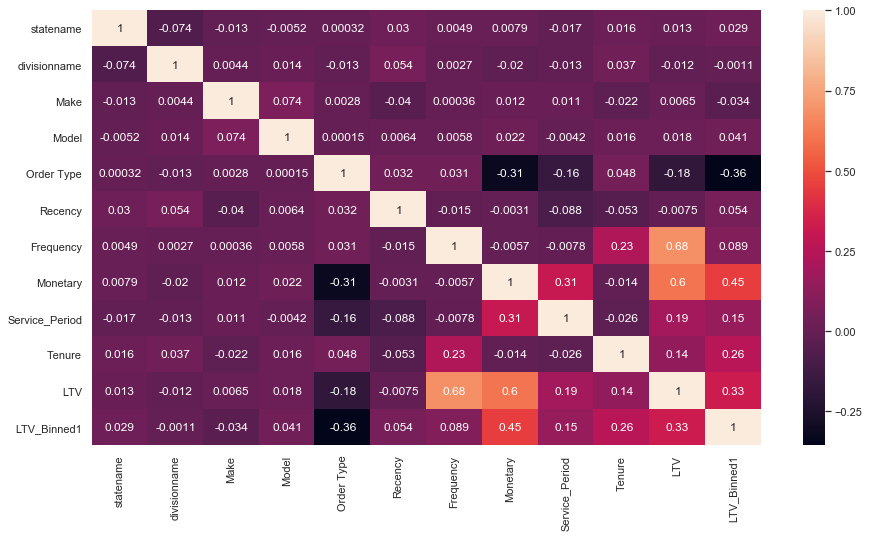

In [164]:
plt.figure(figsize = (15,8))
sns.heatmap(temp_ltv_make_model_r.corr(),annot = True)


In [228]:
temp_ltv_make_model_r['LTV_Binned1'] = temp_ltv_make_model_r['LTV_Binned1'].astype('int64')

In [229]:
X=temp_ltv_make_model_r.drop(["Customer No.","LTV","LTV_Binned1",'Frequency'],1)
y=temp_ltv_make_model_r["LTV_Binned1"]

In [207]:
X = X.drop('Recency',1)

In [230]:
list(X)

['Make_AUDI',
 'Make_BMW',
 'Make_DAEWOO',
 'Make_FIAT',
 'Make_FORCE',
 'Make_FORD',
 'Make_GENERAL MOTORS',
 'Make_HINDUSTAN MOTORS',
 'Make_HONDA',
 'Make_HYUNDAI',
 'Make_JEEP',
 'Make_LAND ROVER',
 'Make_MAHINDRA &  MAHINDRA',
 'Make_MARUTI SUZUKI',
 'Make_MERCEDES BENZ',
 'Make_MITSUBISHI MOTORS',
 'Make_MORRIS',
 'Make_NISSAN',
 'Make_PORCHE',
 'Make_PREMIER\xa0AUTOMOBILES',
 'Make_RENAULT',
 'Make_SAN MOTORS',
 'Make_SKODA',
 'Make_SONALIKA',
 'Make_TATA MOTORS',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Model_207',
 'Model_3 SERIES',
 'Model_5 SERIES',
 'Model_500',
 'Model_6 SERIES',
 'Model_7 SERIES',
 'Model_800',
 'Model_A STAR',
 'Model_A4',
 'Model_A6',
 'Model_A7',
 'Model_A8',
 'Model_ACCENT',
 'Model_ACCORD',
 'Model_ACE',
 'Model_ADVENTURE',
 'Model_ALTO',
 'Model_AMAZE',
 'Model_AMBASSADOR',
 'Model_AMEO',
 'Model_ARIA',
 'Model_ARMADA',
 'Model_ASTAR',
 'Model_AUSTIN',
 'Model_AVEO',
 'Model_AVEO UV-A',
 'Model_AVIGO',
 'Model_BALENO',
 'Model_BEAT',
 'M

In [231]:
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
pd.set_option('display.max_columns', None)

In [232]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=0)

In [233]:
X_trainval,X_testval,y_trainval,y_testval=tts(X_train,y_train,test_size=0.3,random_state=0)

In [234]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_trainval,y_trainval)

y_pred_dt_val = dt.predict(X_testval)
y_pred_dt_train = dt.predict(X_trainval)
y_pred = dt.predict(X_test)
print(classification_report(y_testval,y_pred_dt_val))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     17873
           2       0.97      0.97      0.97     17955
           3       0.96      0.95      0.95     17743
           4       0.98      0.96      0.97     17732

    accuracy                           0.97     71303
   macro avg       0.97      0.97      0.97     71303
weighted avg       0.97      0.97      0.97     71303



In [235]:
print("val Accuracy :-" , accuracy_score(y_testval,y_pred_dt_val))
print("Training Accuracy :-" ,accuracy_score(y_trainval,y_pred_dt_train))
print("Testing Accuracy :-" ,accuracy_score(y_test,y_pred))

val Accuracy :- 0.9719647139671542
Training Accuracy :- 0.9741484495681391
Testing Accuracy :- 0.9722142748952355


<BarContainer object of 283 artists>

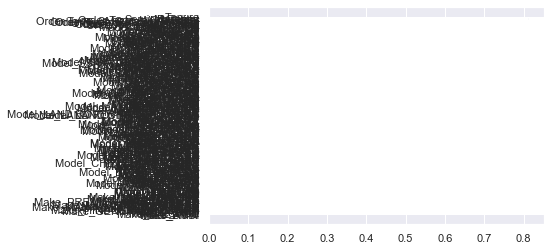

In [236]:
plt.barh(list(X),list(dt.feature_importances_))